In [93]:
import xarray as xr
import xarray.plot as xplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import numpy as np
import cmocean
import pandas as pd
import glob
import os



In [94]:
dir_output='/p/projects/ace/janlandw/climberx_output/'

paths_Toarcian_eq=sorted(glob.glob(dir_output+'180Ma_*'))+sorted(glob.glob(dir_output+'185Ma_*'))
paths_Toarcian_eq_old=sorted(glob.glob(dir_output+'Toarcian_old/180Ma_*'))+sorted(glob.glob(dir_output+'Toarcian_old/185Ma_*'))

# CLIMBER-X simulations for the Toarcian (185/180 Ma)

first set of simulations carried about in 01/2022 -> /p/projects/ace/janlandw/climberx_output/Toarcian_old/ <br>
    - 250, 500, 1000 ppm for 185 and 180 Ma <br>
    
new set of simulations with current CLIMBER-X version 14.06.2022 (commit c60e70fb502d5681ce24cafc86ac21c54c18afdf) <br>
    - 300, 400, 500, 750, 1000, 1250, 1500 ppm

# Plot the GMST of all Toarcian runs

(Toarcian_old -> dotted lines)

Observations: 

- the new simulations are generally colder, especially at lower CO2. This seems to derive especially from colder high-latitude land, linked to higher snow and lower vegetation coverage. -> see [Sec:ColdLand](#sec:ColdLand) 
    
- in the Tethys region (15-50°N) relevant for Carl/Martin the SSTs are relatively higher and the differences to the old runs smaller -> see [Sec:Tethys](#sec:Tethys) 
    
- around 400-500 ppm there is a narrow transition between a largely ice-covered and ice-free state of the quite enclosed north polar sea. Therefore being sensitive to small changes, the 400/500ppm states at 180Ma are about 2°C cooler than those for 185Ma. Oscillations between the two states also occur frequently (e.g. 180Ma_0500ppm_KocsisScotese2020_eq_restart750ppm). &rarr; see [Sec:Oscillations](#sec:oscillations) 
    
    

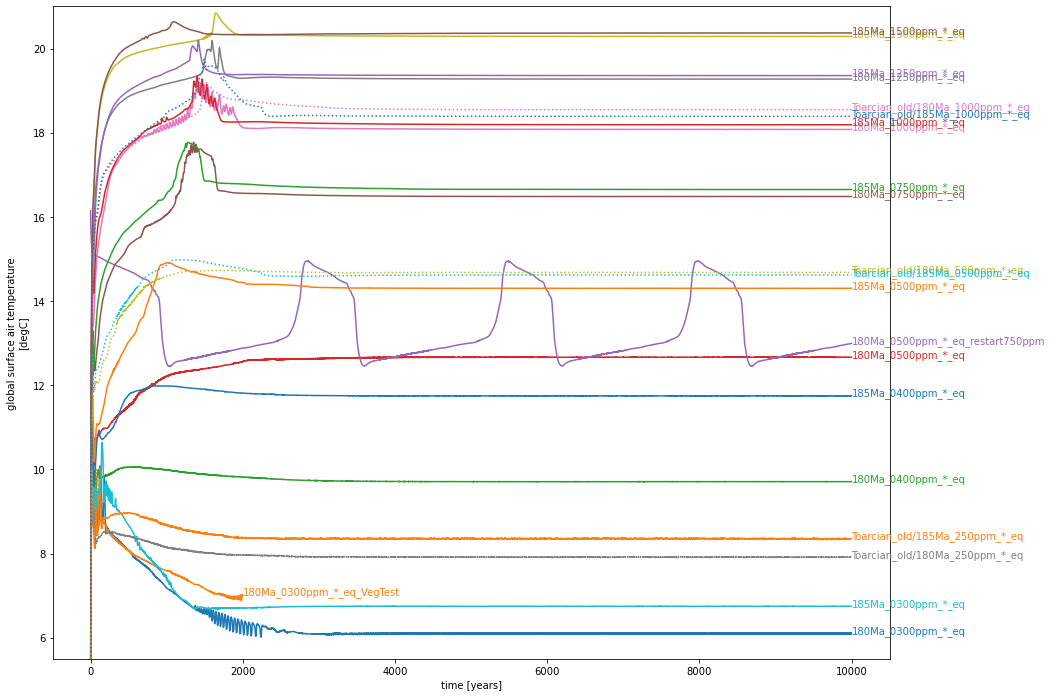

In [144]:
fig,ax=plt.subplots(1,1,figsize=(15,12),facecolor='w')

for path in paths_Toarcian_eq+paths_Toarcian_eq_old:
    if os.path.isfile(path+'/atm_ts.nc'):
        ds = xr.open_dataset(path+'/atm_ts.nc')
        
        run=path.replace(dir_output,'')
        run=run.replace('KocsisScotese2020','*')

        #print(path,ds.coords['time'].data[-1])
        if isinstance(ds.coords['time'].data, np.ndarray) and len(ds.coords['time'].data)>0:
            tg=ds.data_vars['tg']
            ls='-'
            if path in paths_Toarcian_eq_old:
                ls=':'
                
            line,=tg.plot(ls=ls,ax=ax)
            plt.text(ds.coords['time'].data[-1],tg[-1],run,color=line.get_color())
        ds.close()
        
plt.ylim([5.5,21]);

<a id='sec:Tethys'></a>
# Sec:Tethys - SST differences in the Area of Interest

- plotting the ann. mean top-layer ocean temperatures in the region 15-50°N 15°W-40°E for all runs

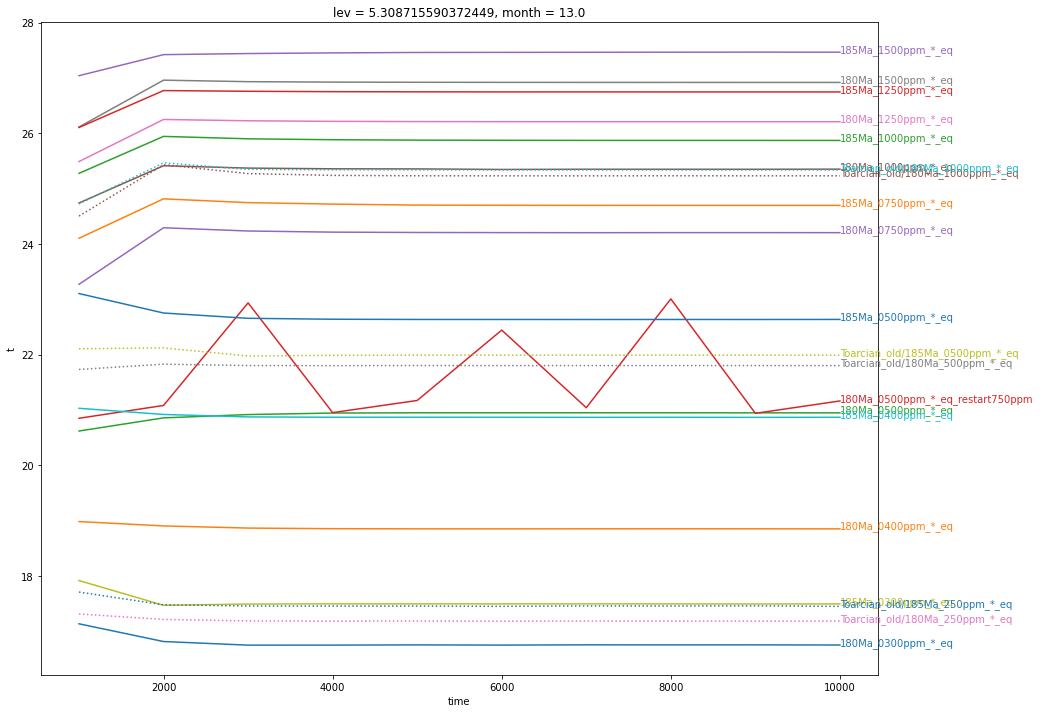

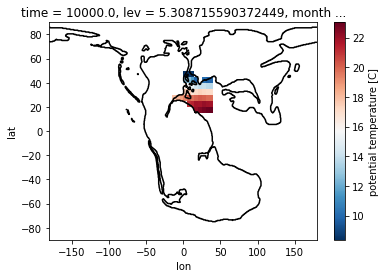

In [141]:
fig,ax=plt.subplots(1,1,figsize=(15,12),facecolor='w')

for path in paths_Toarcian_eq+paths_Toarcian_eq_old:
    if os.path.isfile(path+'/ocn.nc') and path not in ['/p/projects/ace/janlandw/climberx_output/180Ma_0300ppm_KocsisScotese2020_eq_VegTest']:
        ds = xr.open_dataset(path+'/ocn.nc')
        #print(path,ds.coords['time'].data[-1])
        
        run=path.replace(dir_output,'')
        run=run.replace('KocsisScotese2020','*')
        
        if isinstance(ds.coords['time'].data, np.ndarray) and len(ds.coords['time'].data)>0:
            var=ds.data_vars['t'].isel(month=-1,lev=0) #['temp']

            var_lats=var.coords['lat']
            var_lons=var.coords['lon']

            ### mask to the area of interest in the NW Tethys
            var_masked=var.where((var_lats>=15) & (var_lats<=50) & (var_lons>=-15) & (var_lons<=40))
            
            weights = np.cos(np.deg2rad(var_lats))
            var_masked_mean=var_masked.weighted(weights).mean(['lat','lon'])
            
            ls='-'
            if path in paths_Toarcian_eq_old:
                ls=':'
            
            ### Plot the ann. mean top-layer ocean temperature in the area-of-interest over time
            line, = var_masked_mean.plot(ls=ls,ax=ax)
            plt.text(ds.coords['time'].data[-1],var_masked_mean[-1],run,color=line.get_color())

        ds.close()

### Plot map of masked SST for illustration
fig2,ax2=plt.subplots(1,1,num=2,facecolor='w')
ds_geo_hires = xr.open_dataset(path+'/geo_hires.nc')
xplt.contour(ds_geo_hires.data_vars['z_bed'].isel(time=-1),ax=ax2,levels=[0],colors='k');
var_masked.isel(time=-1).plot(ax=ax2,cmap='RdBu_r')


<a id='sec:oscillations'></a>
# Sec:Oscillations - Oscillations linked to freezing of North Pole sea

- GMST difference of ca. +2.5°C between warm state (e.g. model year 8000) and cold state (e.g. model year 9000; top panel) mainly related to warmer Arctic sea (middle row panels)

- this is linked to sea ice fraction (annual mean bottom panels). In the warm state (year 8000), the Arctic sea remains ice free, while it is ice-covered in the cold state throughout the year

Text(0.5, 1.0, 'difference')

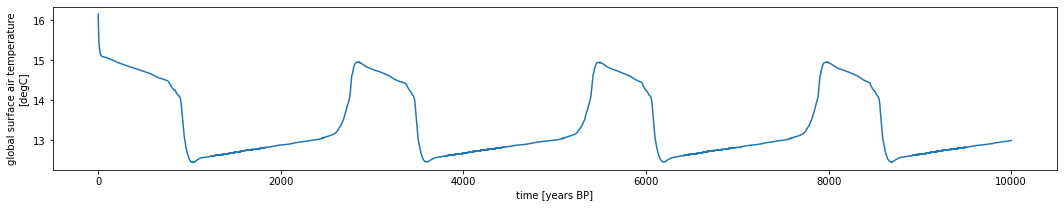

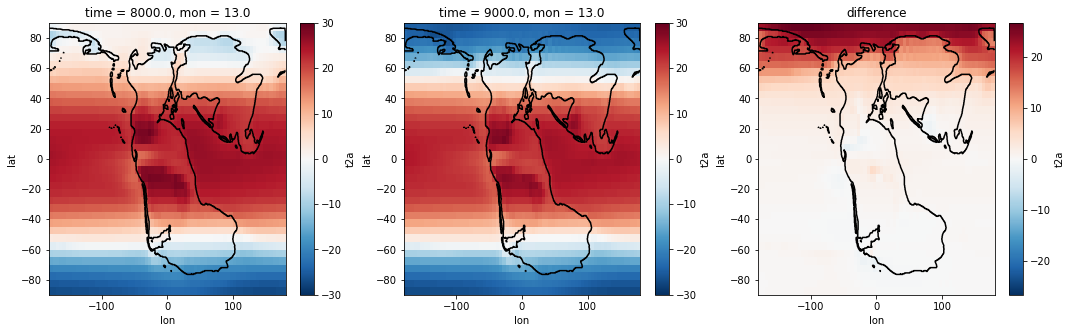

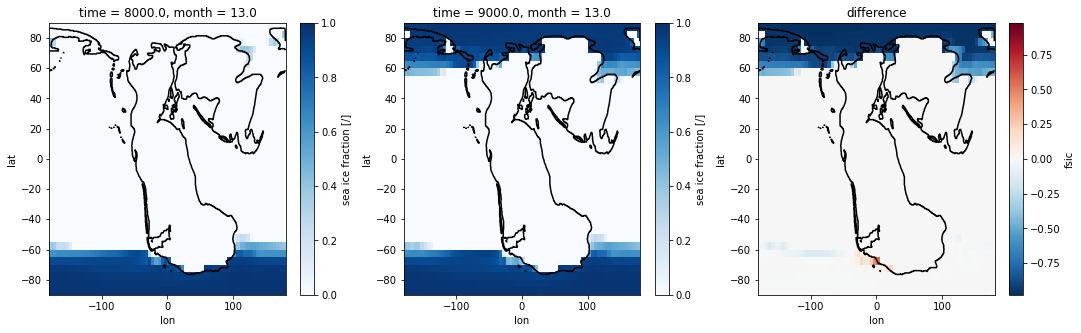

In [142]:
path='/p/projects/ace/janlandw/climberx_output/180Ma_0500ppm_KocsisScotese2020_eq_restart750ppm'

fig1,axs1=plt.subplots(1,1,figsize=(18,3),num=1,facecolor='w')
fig2,axs2=plt.subplots(1,3,figsize=(18,5),num=2,facecolor='w')
fig3,axs3=plt.subplots(1,3,figsize=(18,5),num=3,facecolor='w')

ds_geo_hires = xr.open_dataset(path+'/geo_hires.nc')
for aa in np.append(axs2,axs3):
    xplt.contour(ds_geo_hires.data_vars['z_bed'].isel(time=-1),ax=aa,levels=[0],colors='k');
    
ds1 = xr.open_dataset(path+'/atm_ts.nc')
ds2 = xr.open_dataset(path+'/atm.nc')
ds3 = xr.open_dataset(path+'/sic.nc')

### Plot GMST over time
ds1.tg.plot(ax=axs1)

var2_1=ds2.data_vars['t2a'].isel(mon=-1).sel(time=8000)-273.15
var2_2=ds2.data_vars['t2a'].isel(mon=-1).sel(time=9000)-273.15
var2_diff=var2_1-var2_2

### Plot maps of SAT for years 8000 and 9000, and the difference
vmin=-30
vmax=+30
var2_1.plot(ax=axs2[0], vmin=vmin, vmax=vmax, cmap='RdBu_r')
var2_2.plot(ax=axs2[1], vmin=vmin, vmax=vmax, cmap='RdBu_r')
var2_diff.plot(ax=axs2[2])

### Plot maps of ann. mean sea ice fraction for years 8000 and 9000, and the difference
var3_1=ds3.data_vars['fsic'].isel(month=-1).sel(time=8000) 
var3_2=ds3.data_vars['fsic'].isel(month=-1).sel(time=9000)
var3_diff=var3_1-var3_2

vmin=0
vmax=1
var3_1.plot(ax=axs3[0], vmin=vmin, vmax=vmax,cmap='Blues')
var3_2.plot(ax=axs3[1], vmin=vmin, vmax=vmax,cmap='Blues')
var3_diff.plot(ax=axs3[2])

axs2[2].set_title('difference')
axs3[2].set_title('difference')

<a id='sec:ColdLand'></a>
# Sec:ColdLand - Cooler global state linked to lower temperatures, more snow and less vegetation in high latitude land

- 180Ma_0300ppm with the new model version is colder than Toarcian_old/180Ma_250ppm, which derives especially from colder high-latitude land (panels row 1)

- this is linked to a higher surface albedo (panels row 2), enhanced snow cover (panels row 3) and lower/absent vegetation cover (panels rows 4 and 5)

- northern hemisphere boundary between bare/snowy and vegetated region looks strangely straight. Looks more organic at other pCO2 levels, but the principle differences are similar.

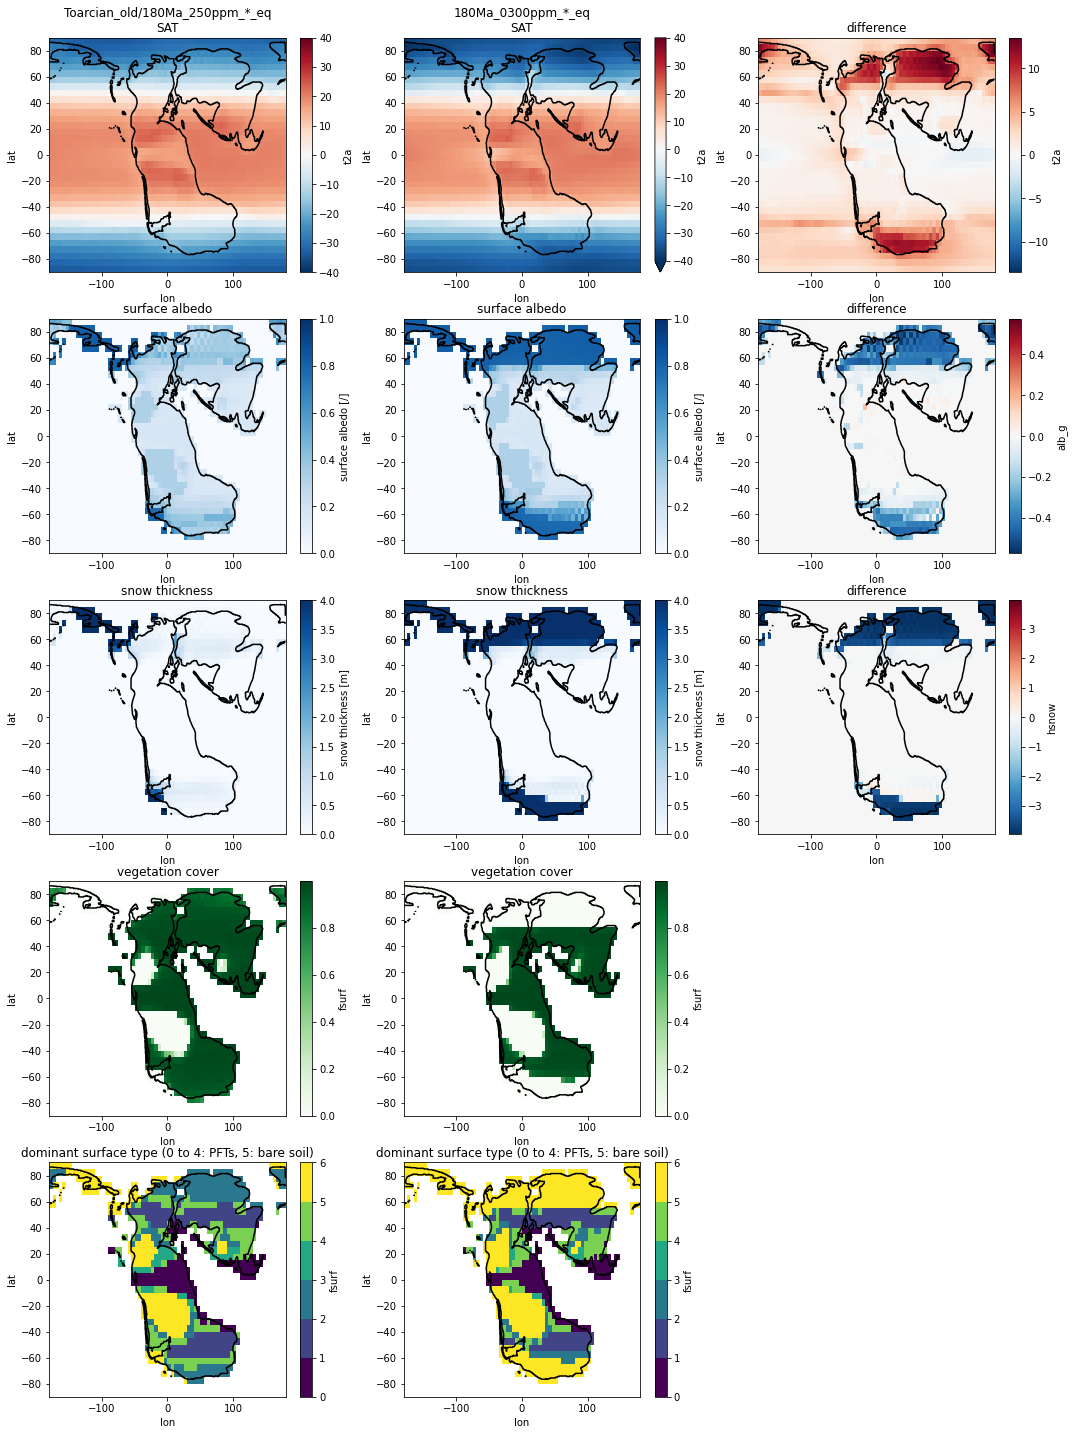

In [150]:
path='/p/projects/ace/janlandw/climberx_output/Toarcian_old/180Ma_250ppm_KocsisScotese2020_eq'
#path='/p/projects/ace/janlandw/climberx_output/180Ma_0300ppm_KocsisScotese2020_eq_VegTest'
path2='/p/projects/ace/janlandw/climberx_output/180Ma_0300ppm_KocsisScotese2020_eq'

run=path.replace(dir_output,'')
run=run.replace('KocsisScotese2020','*')
run2=path2.replace(dir_output,'')
run2=run2.replace('KocsisScotese2020','*')

ds1_1 = xr.open_dataset(path+'/atm.nc')
ds1_2 = xr.open_dataset(path2+'/atm.nc')
ds2_1 = xr.open_dataset(path+'/lnd_surf.nc')
ds2_2 = xr.open_dataset(path2+'/lnd_surf.nc')

fig,axs=plt.subplots(5,3,figsize=(18,25),num=1,facecolor='w')
#fig2,axs1=plt.subplots(1,3,figsize=(18,5),num=2)

ds_geo_hires = xr.open_dataset(path+'/geo_hires.nc')
for ii in range(axs.shape[0]):
    for jj in range(axs.shape[1]):
        aa=axs[ii,jj]
        ds_geo_hires.data_vars['z_bed'].isel(time=-1).plot.contour(ax=aa,levels=[0],colors='k');

### Plot maps of the ann. mean SATs and their difference
var1_1=ds1_1.data_vars['t2a'].isel(mon=-1,time=-1)-273.15
var1_2=ds1_2.data_vars['t2a'].isel(mon=-1,time=-1)-273.15
var1_diff=var1_1-var1_2

vmin=-40
vmax=+40
var1_1.plot(ax=axs[0,0], vmin=vmin, vmax=vmax, cmap='RdBu_r')
var1_2.plot(ax=axs[0,1], vmin=vmin, vmax=vmax, cmap='RdBu_r')
var1_diff.plot(ax=axs[0,2])

### Plot maps of the ann. mean surface albedos and their difference
var2_1=ds2_1.data_vars['alb_g'].isel(month=-1,time=-1)
var2_2=ds2_2.data_vars['alb_g'].isel(month=-1,time=-1)
var2_diff=var2_1-var2_2

vmin=0
vmax=1
var2_1.plot(ax=axs[1,0], vmin=vmin, vmax=vmax, cmap='Blues')
var2_2.plot(ax=axs[1,1], vmin=vmin, vmax=vmax, cmap='Blues')
var2_diff.plot(ax=axs[1,2])

### Plot maps of the ann. mean snow thicknesses and their difference

var3_1=ds2_1.data_vars['hsnow'].isel(month=-1,nsoil=0,time=-1)
var3_2=ds2_2.data_vars['hsnow'].isel(month=-1,nsoil=0,time=-1)
var3_diff=var3_1-var3_2

var3_1.plot(ax=axs[2,0], cmap='Blues')
var3_2.plot(ax=axs[2,1], cmap='Blues')
var3_diff.plot(ax=axs[2,2])

### Plot maps of the vegetation fraction (sum of the fractions of the 5 PFTs)
var4_1=ds2_1.data_vars['fsurf'].isel(nsurf=slice(0,4+1,1)).sum(dim='nsurf').where(ds2_1.data_vars['fland']>0).isel(time=-1)
var4_2=ds2_2.data_vars['fsurf'].isel(nsurf=slice(0,4+1,1)).sum(dim='nsurf').where(ds2_2.data_vars['fland']>0).isel(time=-1)

var4_1.plot(ax=axs[3,0], cmap='Greens') #levels=int(var3.max())+3,vmin=int(var3.min())-1,vmax=int(var3.max())+1
var4_2.plot(ax=axs[3,1], cmap='Greens') #,levels=int(var3_2.max())+3,vmin=int(var3_2.min())-1,vmax=int(var3_2.max())+1

### Plot maps of the surface types with highest fraction
var5_1=ds2_1.data_vars['fsurf'].argmax(dim='nsurf').where(ds2_1.data_vars['fland']>0).isel(time=-1)
var5_2=ds2_2.data_vars['fsurf'].argmax(dim='nsurf').where(ds2_2.data_vars['fland']>0).isel(time=-1)

var5_1.plot(ax=axs[4,0],levels=range(6+1)) #levels=int(var3.max())+3,vmin=int(var3.min())-1,vmax=int(var3.max())+1
var5_2.plot(ax=axs[4,1],levels=range(6+1)) #,levels=int(var3_2.max())+3,vmin=int(var3_2.min())-1,vmax=int(var3_2.max())+1

axs[0,0].set_title(run+'\n'+'SAT')
axs[0,1].set_title(run2+'\n'+'SAT')
axs[1,0].set_title('surface albedo')
axs[1,1].set_title('surface albedo')
axs[2,0].set_title('snow thickness')
axs[2,1].set_title('snow thickness')
axs[3,0].set_title('vegetation cover')
axs[3,1].set_title('vegetation cover')
axs[4,0].set_title('dominant surface type (0 to 4: PFTs, 5: bare soil)')
axs[4,1].set_title('dominant surface type (0 to 4: PFTs, 5: bare soil)')
for aa in axs[:,-1]:
    aa.set_title('difference')
    
for aa in [axs[-1,-1],axs[-2,-1]]:
    aa.set_visible(False)